## Super-T bridge model using shell hybrid model type

Here we recreate the super-T bridge example, instead using the shell-beam hybrid model type in ospgrillage.


In [5]:
import numpy as np
import ospgrillage as og
from IPython import display  # to display images in this notebook
%matplotlib inline

In [6]:


kilo = 1e3
milli = 1e-3
N = 1
m = 1
mm = milli * m
m2 = m ** 2
m3 = m ** 3
m4 = m ** 4
kN = kilo * N
Pa = 1
MPa = N / ((mm) ** 2)
GPa = kilo * MPa
kPa = kilo * Pa

concrete = og.create_material(material="concrete", code="AS5100-2017", grade="65MPa")
concrete_custom = og.create_material(
    material="concrete", E=50 * GPa, v=0.3, rho=24 * kN / m3
)
# create material of slab shell
slab_shell_mat = og.create_material(
    material="concrete", code="AS5100-2017", grade="50MPa", rho=2400
)

edge_longitudinal_section = og.create_section(
    A=0.934 * m2,
    J=0.1857 * m3,
    Iz=0.3478 * m4,
    Iy=0.213602 * m4,
    Az=0.444795 * m2,
    Ay=0.258704 * m2,
)

longitudinal_section = og.create_section(
    A=1.025 * m2,
    J=0.1878 * m3,
    Iz=0.3694 * m4,
    Iy=0.3634 * m4,
    Az=0.4979 * m2,
    Ay=0.309 * m2,
)

transverse_section = og.create_section(
    A=0.504 * m2,
    J=5.22303e-3 * m3,
    Iy=0.32928 * m4,
    Iz=1.3608e-3 * m4,
    Ay=0.42 * m2,
    Az=0.42 * m2,
    unit_width=True,
)

end_transverse_section = og.create_section(
    A=0.504 / 2 * m2,
    J=2.5012e-3 * m3,
    Iy=0.04116 * m4,
    Iz=0.6804e-3 * m4,
    Ay=0.21 * m2,
    Az=0.21 * m2,
)

I_beam_section = og.create_section(
        A=0.896, J=0.133, Iy=0.213, Iz=0.259, Ay=0.233, Az=0.58
    )
slab_section = og.create_section(
    A=0.04428,
    J=2.6e-4,
    Iy=1.1e-4,
    Iz=2.42e-4,
    Ay=3.69e-1,
    Az=3.69e-1,
    unit_width=True,
)
exterior_I_beam_section = og.create_section(
    A=0.044625, J=2.28e-3, Iy=2.23e-1, Iz=1.2e-3, Ay=3.72e-2, Az=3.72e-2
)

# define grillage members
I_beam = og.create_member(
    member_name="Intermediate I-beams", section=I_beam_section, material=concrete
)
slab = og.create_member(
    member_name="concrete slab", section=slab_section, material=concrete
)
exterior_I_beam = og.create_member(
    member_name="exterior I beams",
    section=exterior_I_beam_section,
    material=concrete,
)

L = 33.5 * m  # span
w = 11.565 * m  # width
n_l = 7  # number of longitudinal members
n_t = 11  # number of transverse members
edge_dist = 1.05 * m  # distance between edge beam and first exterior beam
ext_to_int_dist = (
    2.2775 * m
)  # distance between first exterior beam and first interior beam
angle = 0  # skew angle

# create section of slab shell
slab_shell_section = og.create_section(h=0.2)
# shell elements for slab
slab_shell = og.create_member(section=slab_shell_section, material=slab_shell_mat)

# construct grillage model
example_bridge = og.create_grillage(
    bridge_name="shelllink_10m",
    long_dim=10,
    width=7,
    skew=0,
    num_long_grid=6,
    num_trans_grid=11,
    edge_beam_dist=1,
    mesh_type="Orth",
    model_type="shell_beam",
    max_mesh_size_z=1,
    max_mesh_size_x=1,
    offset_beam_y_dist=0.499,
    beam_width=0.89,
)

# set beams
example_bridge.set_member(I_beam, member="interior_main_beam")
example_bridge.set_member(I_beam, member="exterior_main_beam_1")
example_bridge.set_member(I_beam, member="exterior_main_beam_2")
# set shell
example_bridge.set_shell_members(slab_shell)

example_bridge.create_osp_model(pyfile=False)


Note the current ops_vis module of OpenSeesPy does not support plotting of hybrid model. Instead, we use the GetRendering module (preceding plotting module) of OpenSeesPy to visualize the model.

In [ ]:
display.Image("../../_images/33m_bridge_shell.PNG",width=800)

FileNotFoundError: No such file or directory: '../../_images/33m_bridge_shell.PNG'

FileNotFoundError: No such file or directory: '../../_images/33m_bridge_shell.PNG'

<IPython.core.display.Image object>

In [3]:
og.opsv.plot_model(element_labels=0, az_el=(-90, 0))  # plotting using ops_vis
og.plt.show()

<IPython.core.display.Javascript object>

ValueError: too many values to unpack (expected 2)

No Model_ODB specified, trying to get data from the active model.
3D model


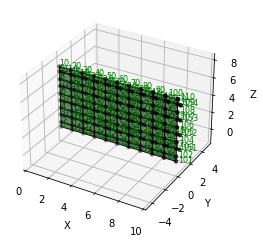

(<Figure size 432x288 with 1 Axes>, <Axes3DSubplot:xlabel='X', ylabel='Y'>)

In [7]:
og.opsplt.plot_model("nodes")